**Importing data**


In [24]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [25]:
import yfinance as yf
#list of ETF
tickers= "RELIANCE.NS GAIL.NS BHARTIARTL.NS APOLLOHOSP.NS TATAMOTORS.NS"
df_5tickerclosing = yf.download(tickers, start="2009-01-01", end="2022-12-31")['Adj Close']
df_5tickerclosing.reset_index(inplace=True)
df_5tickerclosing["Date"]=df_5tickerclosing.Date.dt.date


[*********************100%***********************]  5 of 5 completed


In [28]:
df_5tickerclosing.columns=['Date','APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS']

***Descriptive Data Analysis***

Close price

In [32]:
import pandas as pd

In [33]:
#mean
pd.DataFrame(df_5tickerclosing.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0
APOLLOHOSP  1357.942714
BHARTIARTL   369.802776
GAIL          65.560496
RELIANCE     897.850537
TATAMOTORS   294.430480

In [34]:
#standard deviation
pd.DataFrame(df_5tickerclosing.std())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0
APOLLOHOSP  1153.238096
BHARTIARTL   131.728403
GAIL          19.389420
RELIANCE     698.538209
TATAMOTORS   140.273365

In [35]:
#coefficient of variance
pd.DataFrame(df_5tickerclosing.std()/df_5tickerclosing.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0
APOLLOHOSP  0.849254
BHARTIARTL  0.356213
GAIL        0.295749
RELIANCE    0.778012
TATAMOTORS  0.476423

In [36]:
for symbol in ['APOLLOHOSP', 'BHARTIARTL', 'GAIL', 'RELIANCE', 'TATAMOTORS']:
  df_5tickerclosing["previous_{}".format(symbol)] = df_5tickerclosing[symbol].shift(1)
  df_5tickerclosing['return_{}'.format(symbol)] = (df_5tickerclosing[symbol] / df_5tickerclosing["previous_{}".format(symbol)] ) - 1
  df_5tickerclosing['per_return_{}'.format(symbol) ] = df_5tickerclosing['return_{}'.format(symbol)] * 100
  df_5tickerclosing.head()

In [38]:
import numpy as np
import pandas as pd

import plotnine

from plotnine import *
from plotnine import data
from pandas import DataFrame

Return 

In [39]:
return_df_5tickerclosing=df_5tickerclosing[[x  for x in list(df_5tickerclosing.columns) if ('return' in x.split('_') )]].dropna()

In [40]:
return_df_5tickerclosing.join(df_5tickerclosing['Date'])

return_APOLLOHOSP  per_return_APOLLOHOSP  return_BHARTIARTL  \
1             -0.023621              -2.362111          -0.027309   
2             -0.009592              -0.959182          -0.041785   
3             -0.014527              -1.452728          -0.010654   
4             -0.044660              -4.466029          -0.017077   
5              0.029489               2.948919          -0.023556   
...                 ...                    ...                ...   
3399          -0.001466              -0.146604           0.000065   
3400           0.017514               1.751399           0.022389   
3401           0.005211               0.521072           0.000319   
3402          -0.015095              -1.509541           0.012127   
3403           0.015396               1.539614           0.005738   

      per_return_BHARTIARTL  return_GAIL  per_return_GAIL  return_RELIANCE  \
1                 -2.730894     0.030821         3.082129         0.061761   
2                 -4.178522    -0.014717        -1.471663         0.003697   
3                 -1.065438    -0.058084        -5.808425        -0.124116   
4                 -1.707685     0.019633         1.963268        -0.039558   
5                 -2.355643     0.017773         1.777322        -0.047995   
...                     ...          ...              ...              ...   
3399               0.006526    -0.000587        -0.058749         0.016050   
3400               2.238907    -0.000588        -0.058793         0.017644   
3401               0.031922    -0.002353        -0.235291         0.017399   
3402               1.212663     0.031250         3.124993         0.002687   
3403               0.573841    -0.011435        -1.143511        -0.011597   

      per_return_RELIANCE  return_TATAMOTORS  per_return_TATAMOTORS  \
1                6.176133           0.013633               1.363260   
2                0.369745           0.044830               4.483034   
3              -12.411569          -0.065969              -6.596938   
4               -3.955847          -0.048234              -4.823431   
5               -4.799485          -0.025641              -2.564096   
...                   ...                ...                    ...   
3399             1.605013          -0.000379              -0.037853   
3400             1.764401           0.020576               2.057560   
3401             1.739925          -0.012863              -1.286336   
3402             0.268663          -0.002381              -0.238061   
3403            -1.159722          -0.000126              -0.012564   

            Date  
1     2009-01-05  
2     2009-01-06  
3     2009-01-07  
4     2009-01-09  
5     2009-01-12  
...          ...  
3399  2022-10-17  
3400  2022-10-18  
3401  2022-10-19  
3402  2022-10-20  
3403  2022-10-21  

[3403 rows x 11 columns]

In [ ]:
pd.DataFrame(return_df_5tickerclosing.mean())

0
return_APOLLOHOSP      0.001110
per_return_APOLLOHOSP  0.110982
return_BHARTIARTL      0.000510
per_return_BHARTIARTL  0.050999
return_GAIL            0.000551
per_return_GAIL        0.055068
return_RELIANCE        0.000816
per_return_RELIANCE    0.081574
return_TATAMOTORS      0.001133
per_return_TATAMOTORS  0.113298

In [ ]:
pd.DataFrame(return_df_5tickerclosing.std())

0
return_APOLLOHOSP      0.021681
per_return_APOLLOHOSP  2.168132
return_BHARTIARTL      0.021353
per_return_BHARTIARTL  2.135311
return_GAIL            0.019918
per_return_GAIL        1.991822
return_RELIANCE        0.019182
per_return_RELIANCE    1.918220
return_TATAMOTORS      0.028167
per_return_TATAMOTORS  2.816724

In [ ]:
pd.DataFrame(return_df_5tickerclosing.std()/return_df_5tickerclosing.mean())

0
return_APOLLOHOSP      19.535879
per_return_APOLLOHOSP  19.535879
return_BHARTIARTL      41.869757
per_return_BHARTIARTL  41.869757
return_GAIL            36.170207
per_return_GAIL        36.170207
return_RELIANCE        23.515169
per_return_RELIANCE    23.515169
return_TATAMOTORS      24.861191
per_return_TATAMOTORS  24.861191

In [41]:
import seaborn as sns

In [42]:
import matplotlib.pyplot as plt

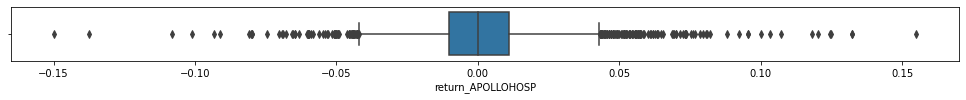

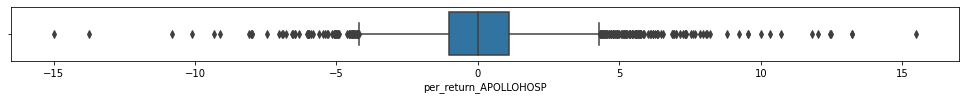

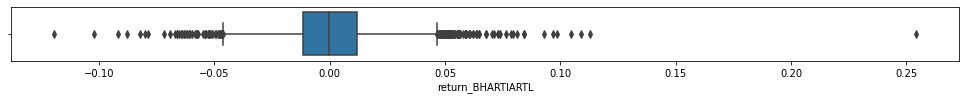

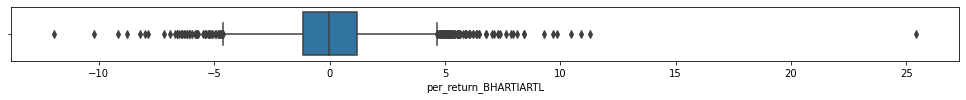

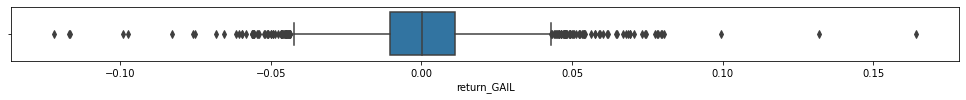

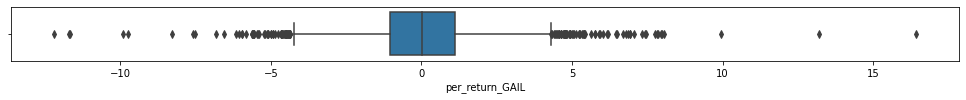

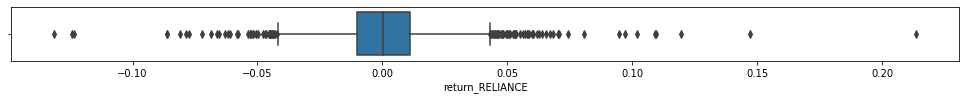

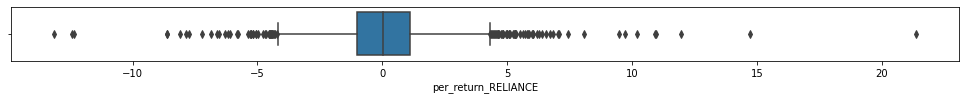

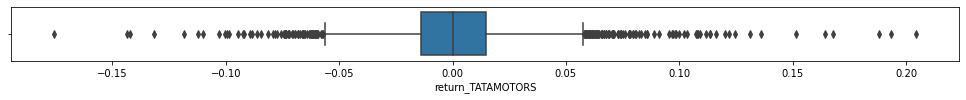

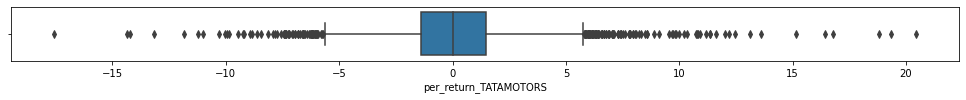

In [43]:
#df_5tickerclosing
import matplotlib.pyplot as plt
df1=return_df_5tickerclosing.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=return_df_5tickerclosing, x=column)

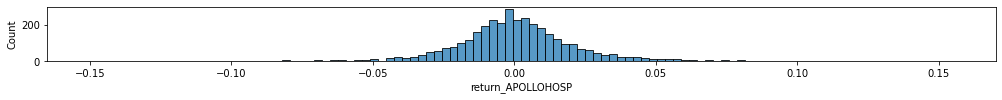

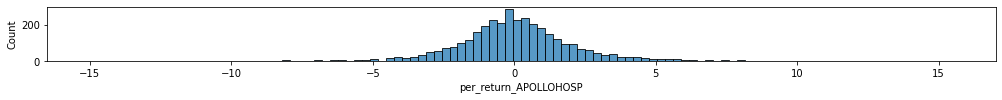

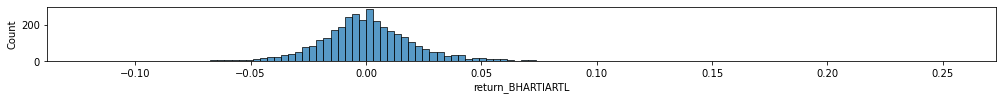

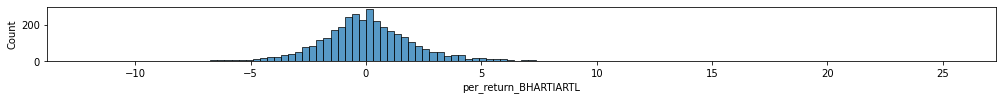

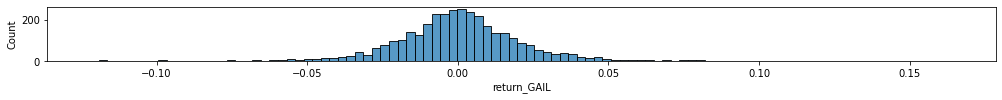

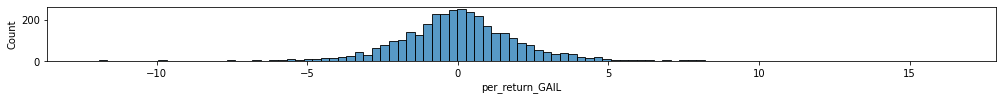

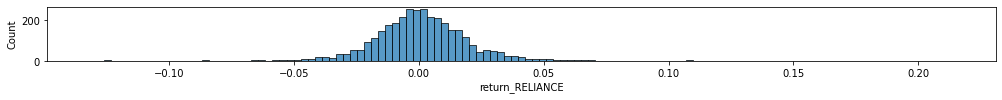

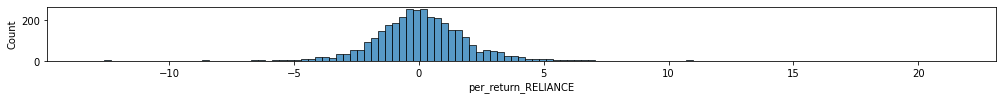

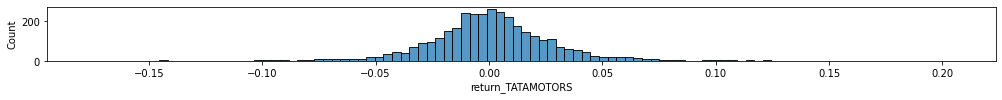

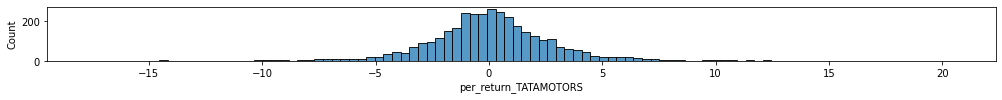

In [44]:
for column in df1:
  plt.figure(figsize=(17,1))
  sns.histplot(data=return_df_5tickerclosing, x=column)

Normal P plot

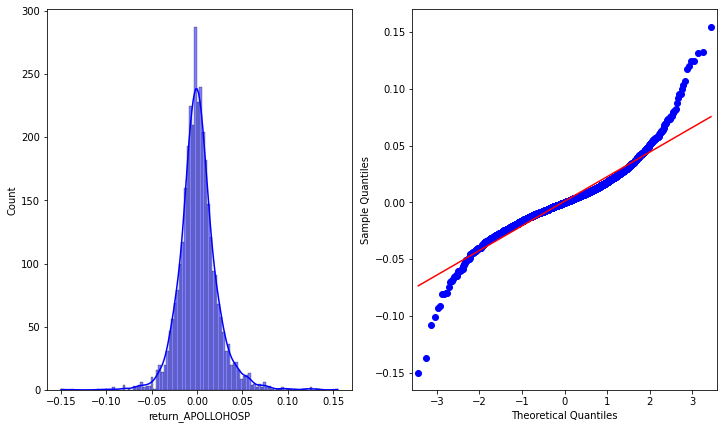

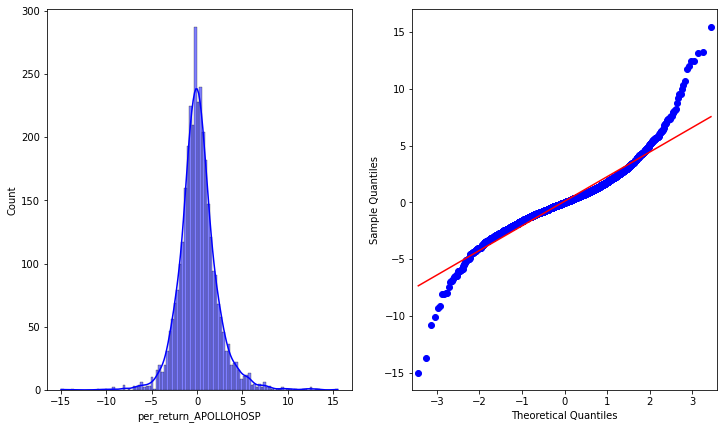

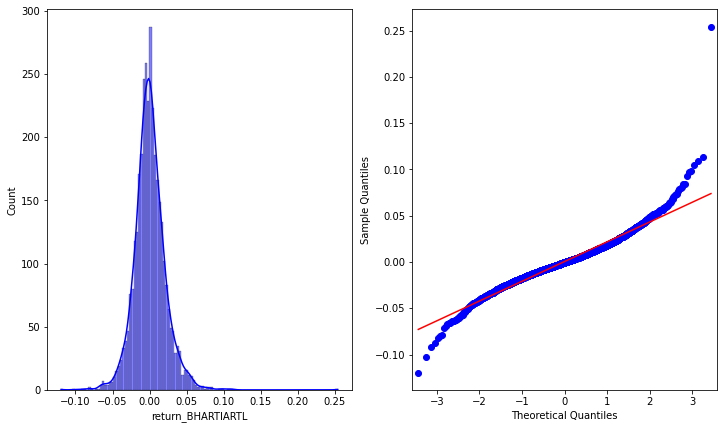

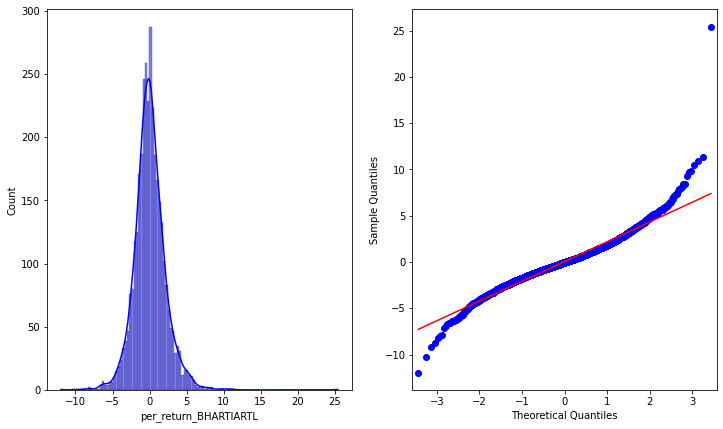

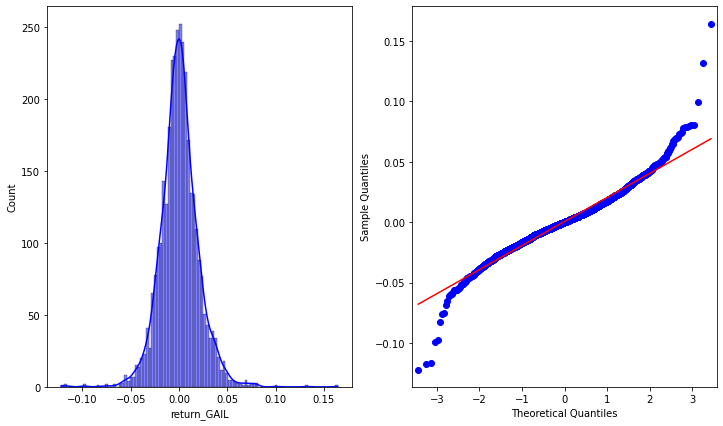

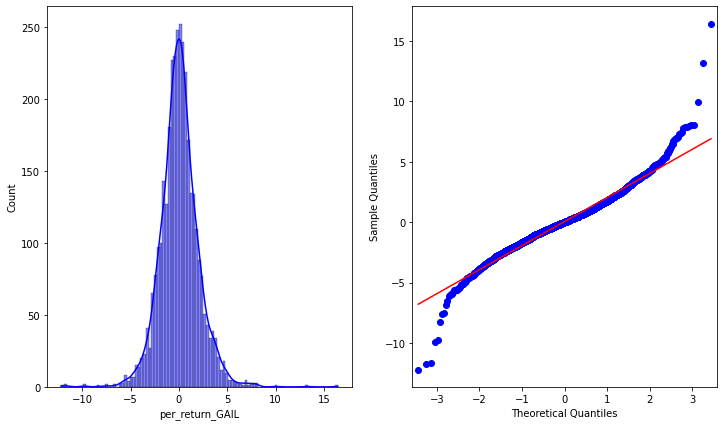

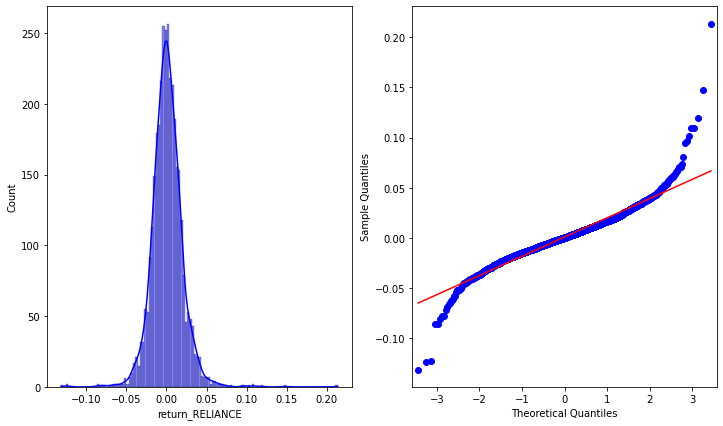

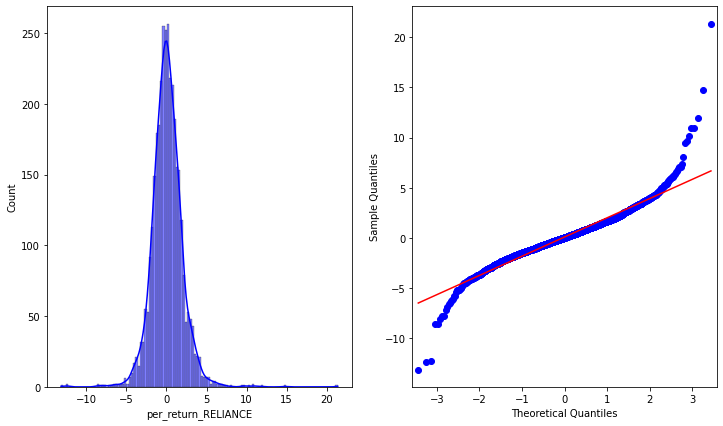

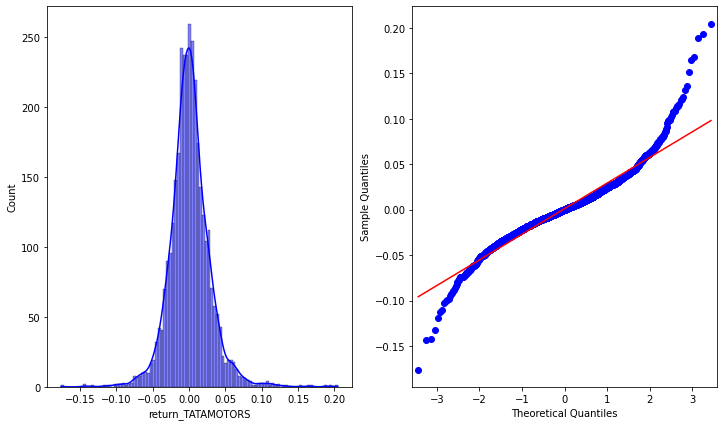

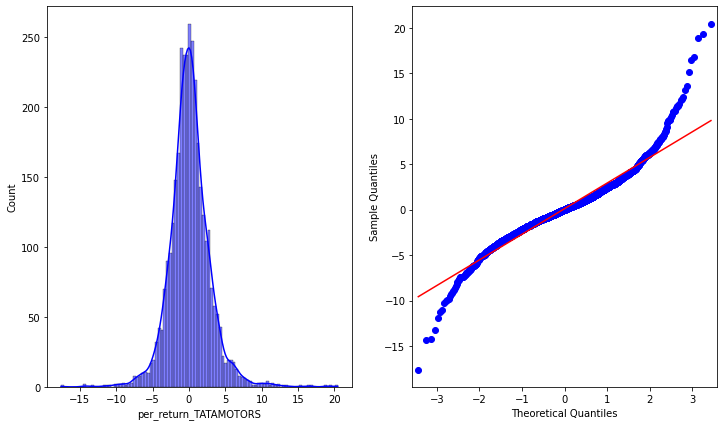

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
  

# plots for standard distribution
for col in list(return_df_5tickerclosing.columns):
  fig, ax = plt.subplots(1, 2, figsize=(12, 7))
  sns.histplot(return_df_5tickerclosing[col],kde=True, color ='blue',ax=ax[0])
  sm.ProbPlot(return_df_5tickerclosing[col]).qqplot(line='s', ax=ax[1])
  


Moving Average

In [46]:
def bollinger_band(symbol, df,n,m):
  TP=df[['Date',symbol]].sort_values('Date').reset_index(drop=True)
  data=TP[symbol]
  #.dropna()
  B_MA=pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA_{}'.format(symbol))

  sigma=(data.rolling(n, min_periods=n).std())#.dropna())
  BU=pd.Series((B_MA+m*sigma), name='BU_{}'.format(symbol))
  BL=pd.Series((B_MA-m*sigma), name='BL_{}'.format(symbol))

  return_df=pd.concat([TP,B_MA,BU,BL],axis=1).dropna()
  return return_df
  #retun_df.columns=[symbol,]

In [47]:
return_df = return_df_5tickerclosing.join(df_5tickerclosing['Date'])


In [ ]:
import plotly.io as pio
import plotly.graph_objects as go 

import matplotlib.pyplot as plt
n=200
m=2

pio.templates.default="plotly_dark"

for symbol in return_df.columns[:-1]:
  bb=bollinger_band(symbol, return_df, n, m)
  

  fig=go.Figure()

  fig.update_layout(title=symbol)



  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb[symbol],
                          line_color = '#636EFA',
                          name = symbol)),


  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['B_MA_{}'.format(symbol)],
                          line_color = '#636EFA',
                          name = 'sma')),

  # Upper Bound
  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['BU_{}'.format(symbol)],
                          line_color = 'rgba(173,204,255,0.2)',
                           fill = 'tonexty',
                           fillcolor='rgba(173,204,255,0.2)',
                          name = 'upper band',
                          opacity = 0.5)),

  # Lower Bound fill in between with parameter 'fill': 'tonexty'
  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['BL_{}'.format(symbol)],
                          line_color = 'rgba(173,204,255,0.2)',
                            fill = 'tonexty',
                          fillcolor='rgba(173,204,255,0.2)',
                          name = 'lower band',
                          opacity = 0.5))
  
  fig.show()

Momentum Graph

In [ ]:
def momentum(symbol, df,n):
  TP=df[['Date',symbol]].sort_values('Date').reset_index(drop=True)
  df_momentum= pd.concat([TP, TP[symbol].pct_change(n)],axis=1)
  df_momentum.columns=['Date',	'rtrn_{}'.format(symbol.split('_')[-1]),	'Mntm_rtrn_{}'.format(symbol.split('_')[-1])]
  return df_momentum

In [ ]:
import plotly.io as pio
import plotly.graph_objects as go 

import matplotlib.pyplot as plt
n=200
m=2

pio.templates.default="plotly_dark"

for symbol in return_df.columns[:-1]:
  bb=momentum(symbol, return_df,14)
  #print(bb.columns)

  fig=go.Figure()

  fig.update_layout(title=symbol)



  fig.add_trace(go.Scatter(x = bb['Date'],
                          y = bb['Mntm_rtrn_{}'.format(symbol.split('_')[-1])],
                          line_color = '#636EFA',
                          name = 'sma'))
  fig.show()





Relative Strength Index

In [48]:
!pip install get_all_tickers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for get-all-tickers: filename=get_all_tickers-1.8-py3-none-any.whl size=4248 sha256=0bb0e5f8ab61e1d29ff4a9dd81c20393e9f002c2670c72d4bd2a317852b9c22f
  Stored in directory: /root/.cache/pip/wheels/f0/8d/8f/25b9632788de8771fb8be22529bbe0ba5ae5446f3be65b1ab3
Successfully built get-all-tickers


In [49]:
# Necessary Libraries
import yfinance as yf, pandas as pd, shutil, os, time, glob
import numpy as np
import requests
from get_all_tickers import get_tickers as gt
from statistics import mean

In [50]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [51]:
for symbol in return_df.columns[:-1]:
  return_df['RSI_{}'.format(symbol)]=computeRSI(return_df[symbol], 10)

In [54]:
return_df.columns

Index(['return_APOLLOHOSP', 'per_return_APOLLOHOSP', 'return_BHARTIARTL',
       'per_return_BHARTIARTL', 'return_GAIL', 'per_return_GAIL',
       'return_RELIANCE', 'per_return_RELIANCE', 'return_TATAMOTORS',
       'per_return_TATAMOTORS', 'Date', 'RSI_return_APOLLOHOSP',
       'RSI_per_return_APOLLOHOSP', 'RSI_return_BHARTIARTL',
       'RSI_per_return_BHARTIARTL', 'RSI_return_GAIL', 'RSI_per_return_GAIL',
       'RSI_return_RELIANCE', 'RSI_per_return_RELIANCE',
       'RSI_return_TATAMOTORS', 'RSI_per_return_TATAMOTORS'],
      dtype='object')

In [55]:
return_list = ['return_APOLLOHOSP', 'per_return_APOLLOHOSP', 'return_BHARTIARTL',
       'per_return_BHARTIARTL', 'return_GAIL', 'per_return_GAIL',
       'return_RELIANCE', 'per_return_RELIANCE', 'return_TATAMOTORS',
       'per_return_TATAMOTORS']

In [56]:

import plotly.io as pio
import plotly.graph_objects as go 
pio.templates.default="plotly_dark"
for symbol in return_list:
  return_df['RSI_{}'.format(symbol)]=computeRSI(return_df[symbol], 10)
  #print(bb.columns)

  fig=go.Figure()

  fig.update_layout(title=symbol)



  fig.add_trace(go.Scatter(x = return_df['Date'],
                          y = return_df['RSI_{}'.format(symbol)],
                          line_color = '#636EFA',
                          name = 'sma'))
  fig.show()


Sensitivity analysis using Beta Index

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# symbols = [stock, market]
# start date for historical prices

def calulate_beta(symbol):
  
  data = yf.download([symbol,'^NSEI'], start="2009-01-01", end="2022-12-31")['Adj Close'] 
  # Convert historical stock prices to daily percent change
  price_change = data.pct_change()
  # Deletes row one containing the NaN
  df = price_change.drop(price_change.index[0])
  # Create arrays for x and y variables in the regression model 
  # Set up the model and define the type of regression
  x = np.array(df[symbol]).reshape((-1,1))
  y = np.array(df['^NSEI'])
  model = LinearRegression().fit(x, y)  
  print('Beta = ', model.coef_)

In [ ]:
symbols = ['APOLLOHOSP.NS',	'BHARTIARTL.NS',	'GAIL.NS',	'RELIANCE.NS',	'TATAMOTORS.NS']

In [ ]:
for symbol in symbols:
  print(symbol)
  calulate_beta(symbol)


APOLLOHOSP.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.17749452]
BHARTIARTL.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.26839737]
GAIL.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.2753587]
RELIANCE.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.44496273]
TATAMOTORS.NS
[*********************100%***********************]  2 of 2 completed
Beta =  [0.25640727]


 **Stationary analysis**

Augmented dickey fuller test

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as st

In [ ]:

for symbol in return_df.columns[:-1]:
  adf = st.adfuller(x=re, regression="ct", maxlag=12)

NameError: ignored

**Periodic Regime Shift analysis:**


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# nifty = pd.read_csv('nifty.csv', index_col=0, parse_dates=True #Get nifty prices
# nifty_ret = nifty.resample('W').last().pct_change().dropna() #Get weekly returns
# nifty_ret.plot(title='Excess returns', figsize=(12, 3)) #Plot the dataset

In [ ]:

return_df.columns[:-1]

Index(['return_APOLLOHOSP', 'per_return_APOLLOHOSP', 'return_BHARTIARTL',
       'per_return_BHARTIARTL', 'return_GAIL', 'per_return_GAIL',
       'return_RELIANCE', 'per_return_RELIANCE', 'return_TATAMOTORS',
       'per_return_TATAMOTORS', 'Date', 'RSI_return_APOLLOHOSP',
       'RSI_per_return_APOLLOHOSP', 'RSI_return_BHARTIARTL',
       'RSI_per_return_BHARTIARTL', 'RSI_return_GAIL', 'RSI_per_return_GAIL',
       'RSI_return_RELIANCE', 'RSI_per_return_RELIANCE',
       'RSI_return_TATAMOTORS'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                        Markov Switching Model Results                        
Dep. Variable:      return_APOLLOHOSP   No. Observations:                 3403
Model:               MarkovRegression   Log Likelihood                8617.884
Date:                Fri, 21 Oct 2022   AIC                         -17217.768
Time:                        15:12:53   BIC                         -17162.576
Sample:                             0   HQIC                        -17198.042
                               - 3403                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0006   8.63e-05      6.382      0.000       0.000       0.001
                             Regime 1 parameters    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                          Markov Switching Model Results                         
Dep. Variable:     per_return_APOLLOHOSP   No. Observations:                 3403
Model:                  MarkovRegression   Log Likelihood               -7053.521
Date:                   Fri, 21 Oct 2022   AIC                          14125.041
Time:                           15:13:02   BIC                          14180.233
Sample:                                0   HQIC                         14144.767
                                  - 3403                                         
Covariance Type:                  approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.4869      0.858      6.393      0.000       3.805       7.169
                            

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                        Markov Switching Model Results                        
Dep. Variable:      return_BHARTIARTL   No. Observations:                 3403
Model:               MarkovRegression   Log Likelihood                8508.404
Date:                Fri, 21 Oct 2022   AIC                         -16998.809
Time:                        15:13:11   BIC                         -16943.617
Sample:                             0   HQIC                        -16979.084
                               - 3403                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   2.25e-05      6.360      0.000    9.89e-05       0.000
                             Regime 1 parameters    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                          Markov Switching Model Results                         
Dep. Variable:     per_return_BHARTIARTL   No. Observations:                 3403
Model:                  MarkovRegression   Log Likelihood               -7162.998
Date:                   Fri, 21 Oct 2022   AIC                          14343.996
Time:                           15:13:21   BIC                          14399.187
Sample:                                0   HQIC                         14363.721
                                  - 3403                                         
Covariance Type:                  approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.2320      0.697      7.504      0.000       3.866       6.599
                            

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                        Markov Switching Model Results                        
Dep. Variable:            return_GAIL   No. Observations:                 3403
Model:               MarkovRegression   Log Likelihood                8707.937
Date:                Fri, 21 Oct 2022   AIC                         -17397.873
Time:                        15:13:31   BIC                         -17342.682
Sample:                             0   HQIC                        -17378.148
                               - 3403                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   2.98e-05     11.358      0.000       0.000       0.000
                             Regime 1 parameters    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                        Markov Switching Model Results                        
Dep. Variable:        per_return_GAIL   No. Observations:                 3403
Model:               MarkovRegression   Log Likelihood               -6965.640
Date:                Fri, 21 Oct 2022   AIC                          13949.280
Time:                        15:13:43   BIC                          14004.472
Sample:                             0   HQIC                         13969.006
                               - 3403                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.4870      0.531      6.572      0.000       2.447       4.527
                             Regime 1 parameters    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                        Markov Switching Model Results                        
Dep. Variable:        return_RELIANCE   No. Observations:                 3403
Model:               MarkovRegression   Log Likelihood                8991.246
Date:                Fri, 21 Oct 2022   AIC                         -17964.493
Time:                        15:13:53   BIC                         -17909.301
Sample:                             0   HQIC                        -17944.767
                               - 3403                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   9.69e-06     19.034      0.000       0.000       0.000
                             Regime 1 parameters    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                         Markov Switching Model Results                        
Dep. Variable:     per_return_RELIANCE   No. Observations:                 3403
Model:                MarkovRegression   Log Likelihood               -6680.148
Date:                 Fri, 21 Oct 2022   AIC                          13378.297
Time:                         15:14:03   BIC                          13433.488
Sample:                              0   HQIC                         13398.022
                                - 3403                                         
Covariance Type:                approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8435      0.097     19.021      0.000       1.654       2.033
                             Regime 1 parame

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                        Markov Switching Model Results                        
Dep. Variable:      return_TATAMOTORS   No. Observations:                 3403
Model:               MarkovRegression   Log Likelihood                7695.882
Date:                Fri, 21 Oct 2022   AIC                         -15373.764
Time:                        15:14:13   BIC                         -15318.572
Sample:                             0   HQIC                        -15354.038
                               - 3403                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   1.43e-05     26.451      0.000       0.000       0.000
                             Regime 1 parameters    

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                          Markov Switching Model Results                         
Dep. Variable:     per_return_TATAMOTORS   No. Observations:                 3403
Model:                  MarkovRegression   Log Likelihood               -7979.550
Date:                   Fri, 21 Oct 2022   AIC                          15977.099
Time:                           15:14:21   BIC                          16032.291
Sample:                                0   HQIC                         15996.825
                                  - 3403                                         
Covariance Type:                  approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        12.8154      1.625      7.886      0.000       9.630      16.001
                            

ValueError: ignored

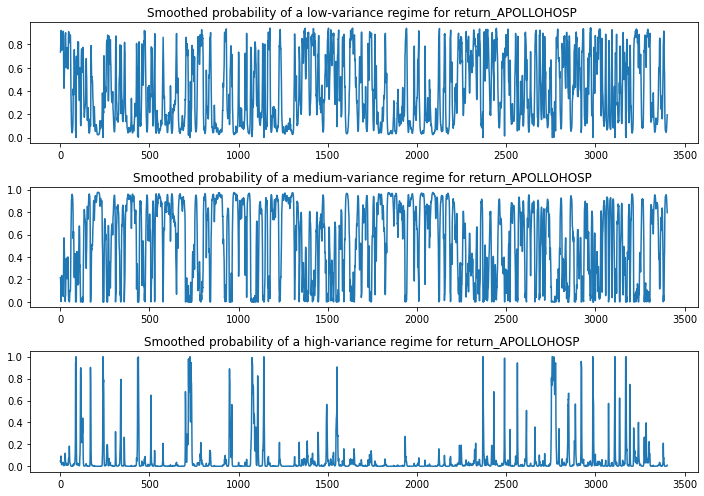

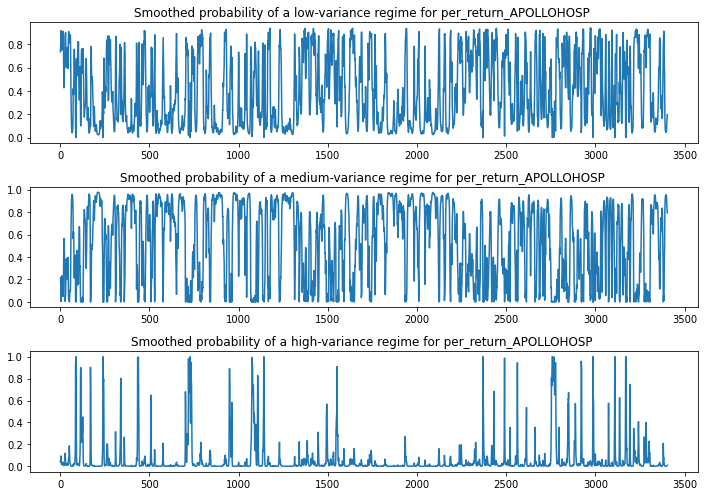

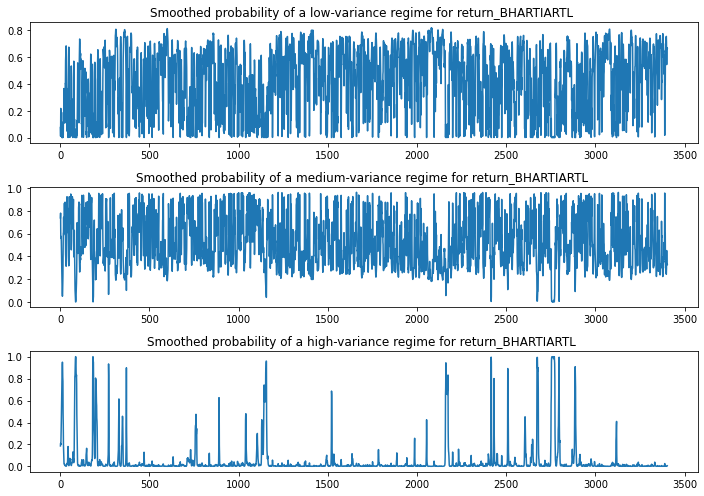

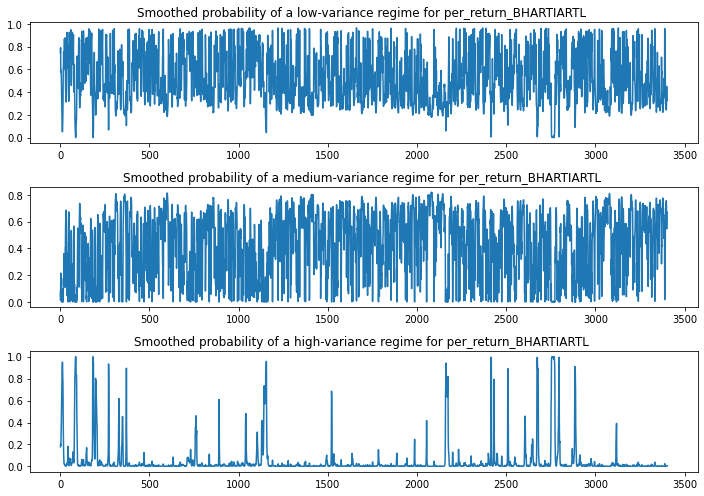

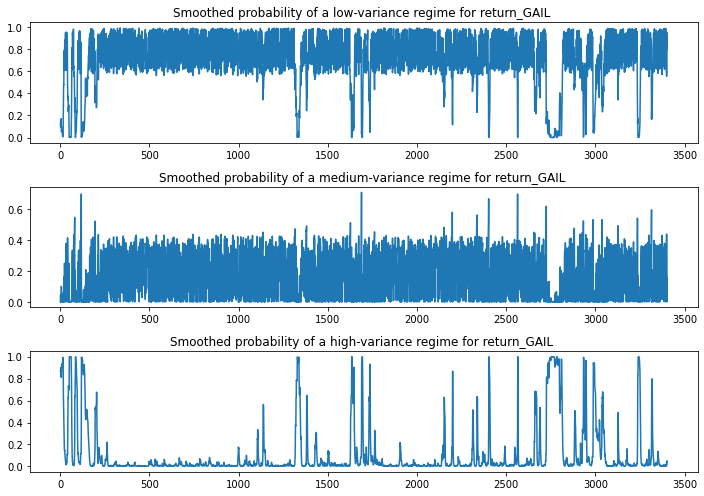

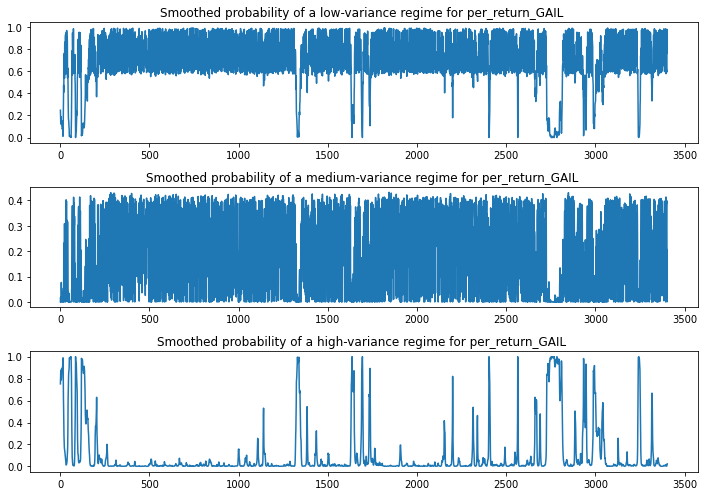

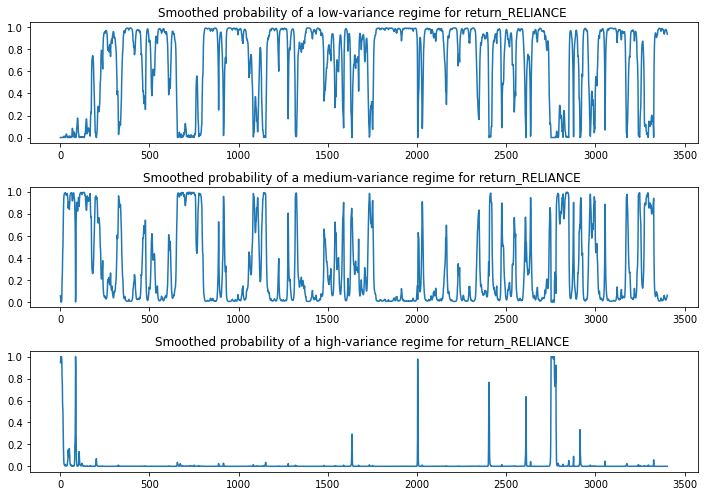

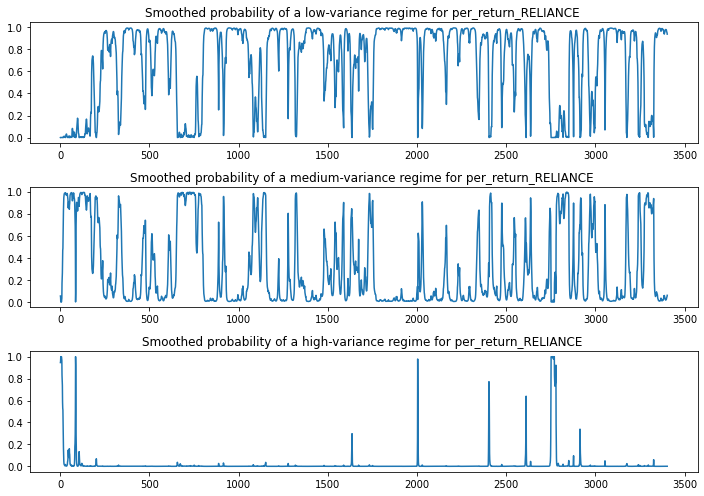

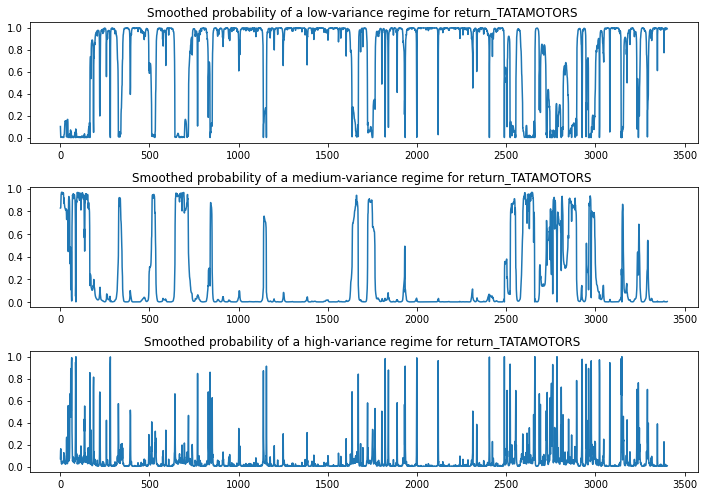

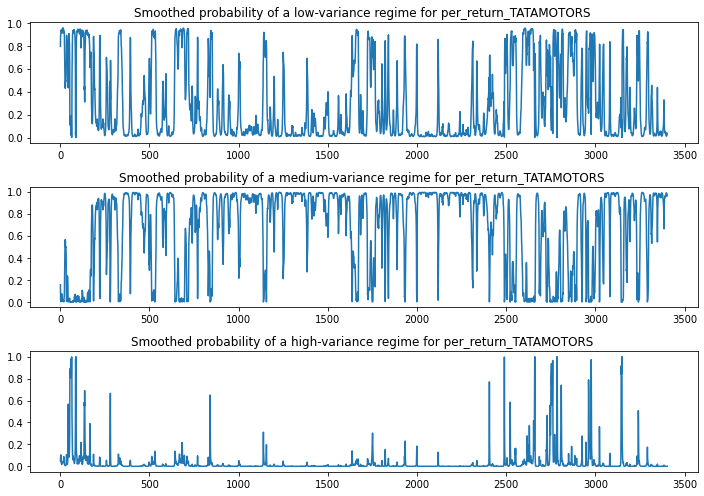

In [ ]:
for symbol in return_df.columns[:-1]:
  mod_kns = sm.tsa.MarkovRegression(return_df[[symbol]].dropna(), k_regimes=3, trend='nc', switching_variance=True)
  res_kns = mod_kns.fit()
  print(res_kns.summary())
  fig, axes = plt.subplots(3, figsize=(10,7))
  ax = axes[0]
  ax.plot(res_kns.smoothed_marginal_probabilities[0])
  ax.set(title='Smoothed probability of a low-variance regime for {} '.format(symbol))#
  ax = axes[1]
  ax.plot(res_kns.smoothed_marginal_probabilities[1])
  ax.set(title='Smoothed probability of a medium-variance regime for {} '.format(symbol))#
  ax = axes[2]
  ax.plot(res_kns.smoothed_marginal_probabilities[2])
  ax.set(title='Smoothed probability of a high-variance regime for {} '.format(symbol))
  fig.tight_layout()

 **Exogenous shock analysis**

In [1]:
!git init

Initialized empty Git repository in D:/New_Downloads/.git/


In [2]:
!git remote add origin https://uday007@bitbucket.org/uday007/wqcapstoneproject.git

In [6]:
!git clone https://uday007@bitbucket.org/uday007/wqcapstoneproject.git

fatal: destination path 'wqcapstoneproject' already exists and is not an empty directory.


In [7]:
!git add --all

fatal: Unable to create 'D:/New_Downloads/.git/index.lock': File exists.

Another git process seems to be running in this repository, e.g.
an editor opened by 'git commit'. Please make sure all processes
are terminated then try again. If it still fails, a git process
may have crashed in this repository earlier:
remove the file manually to continue.


In [5]:
!git commit -m 'first commit'

error: pathspec 'commit'' did not match any file(s) known to git.


In [15]:
!git config --global user.email "ukkumaruday668@gmail.com"
!git config --global user.name "Uday Kumar Verma"

In [80]:
!git config --global core.askpass

In [81]:
!git clone https://uday007@bitbucket.org/uday007/wqcapstoneproject.git

Cloning into 'wqcapstoneproject'...
fatal: could not read Password for 'https://uday007@bitbucket.org': No such device or address


In [74]:
!git remote -v

origin	https://uday007@bitbucket.org/uday007/wqcapstoneproject.git (fetch)
origin	https://uday007@bitbucket.org/uday007/wqcapstoneproject.git (push)


In [78]:
!git push origin master

fatal: could not read Password for 'https://uday007@bitbucket.org': No such device or address
